# SnapChat Filters : Deformations

# Moving Least Squares


In this lecture, we will discuss how to design Snapchat filters based on image deformation. We will use Moving Least Squares (MLS) technique to perform nonlinear deformations on an image.

<table>
    <tr>
        <th><center><a href="https://www.learnopencv.com/wp-content/uploads/2018/01/opcv4face-w5-m5-horseImage.png"><img src="https://www.learnopencv.com/wp-content/uploads/2018/01/opcv4face-w5-m5-horseImage.png"/></a></center></th>
        <th><center><a href="https://www.learnopencv.com/wp-content/uploads/2018/01/opcv4face-w5-m5-horseMLS.png"><img src="https://www.learnopencv.com/wp-content/uploads/2018/01/opcv4face-w5-m5-horseMLS.png"/></a></center></th>
    </tr>
    <tr>
        <td colspan="2">Moving Least Squares is a technique for warping an image based on a few control points. In the above image a few control points, shown using blue circles, are defined. Three of them are moved to produce a horse with an elongated neck. 

The above image was generated using the following online tool

http://chenxing.name/fun/imgwarp-js/
        </td>
    </tr>
</table>

An image can be deformed in an infinite number of ways. Theoretically, every pixel in an image can be independently moved to a different position. Like many things in life, we do not want total control, because absolute control over every single detail can be overwhelming. We just want a few knobs that give us enough control to achieve what we want. 

In affine transform, we have 6 knobs. They are **rotation** ( 1 parameter ), **translation** ( 2 parameters ), **scale** ( two parameters ), and **shear** ( 1 parameter ). 

The affine transform is a linear transform and it is useful in many applications. However, in many warping application we want nonlinear deformation. 

**Moving Least Squares** (MLS) is one such kind of deformation. It allows us to control warping using a few control points defined over the image. The control points are moved to produce the deformation. 

In the figure above, we have shown an example of MLS deformation. On the left is the original image of a horse with control points shown using blue circles. On the right image, three control points on the head are moved to produce an elongated neck. 

## Properties of MLS

Let’s say there are $n$ control points $p_1, p_2, \ldots p_n$ and they are moved to new locations given by $q_1, q_2, \ldots q_n$. The warping function $f$ defined by the MLS has these three properties

1. **Interpolation**: The control points $p_i$ should be directly mapped to $q_i$. In other words, $f(p_i) = q_i$

2. **Smoothness**: $f$ should be a smooth function. 

3. **Identity** : If the point $p_i$ is not moved, the the deformation should be identity. In other words, $f(p_i) = p_i$

## How do you choose control points in MLS?

In MLS, the warp is calculated so that when it is applied to the input control points, we get the output control points. There are two kinds of regions where you should add control points. 

1. Region you want to deform. Let’s say in a fun application called "Pinocchio", you want to elongate the nose. You should put a control point on the tip of the nose. 

2. Region you do not want to deform : In the same application, you may want to make sure the rest of the face is not deformed. So you put a few control points on the face. You may also want to make sure the boundary of the image is not distorted. So you put a few control points there as well. 

Let’s look at an example. For centuries, scholars have debated Monalisa’s mysterious smile. Some even doubt if she is smiling. We are going to recruit her in demonstrating MLS and put an end to this age old debate. 



| <center><a href="https://www.learnopencv.com/wp-content/uploads/2018/01/opcv4face-w5-m5-monalisa.jpg"><img src="https://www.learnopencv.com/wp-content/uploads/2018/01/opcv4face-w5-m5-monalisa.jpg" width=500/></a></center> | <center><a href="https://www.learnopencv.com/wp-content/uploads/2018/01/opcv4face-w5-m5-monalisaSmile.png"><img src="https://www.learnopencv.com/wp-content/uploads/2018/01/opcv4face-w5-m5-monalisaSmile.png" width=500/></a></center> | 
| -------- | -------- | 
 
In the Figure above, on the left is Monalisa with her mysterious smile. On the right is a smiling Monalisa we want to create by applying MLS to the original image. To accomplish this,  we choose a few control points shown in the left image. We have a few control points on the face and some on the boundary of the image. 

| <center><a href="https://www.learnopencv.com/wp-content/uploads/2018/01/opcv4face-w5-m5-monalisaControlPoints.png"><img src="https://www.learnopencv.com/wp-content/uploads/2018/01/opcv4face-w5-m5-monalisaControlPoints.png" width=500/></a></center> | <center><a href="https://www.learnopencv.com/wp-content/uploads/2018/01/opcv4face-w5-m5-monalisaSmileConrolPoints.png"><img src="https://www.learnopencv.com/wp-content/uploads/2018/01/opcv4face-w5-m5-monalisaSmileConrolPoints.png" width=500/></a></center> | 
| -------- | -------- | 
 

Next, we move only two control points on the lips to make her smile. Because the other control points have not moved, the image does not deform in those locations. 

On the other hand, because we did not put any control points on the forehead, it is slightly broader than the original image. 

# MLS based SnapChat Filters

We will now discuss two SnapChat filters based on MLS. As you can imagine, there are many funny filters you can design with the knowledge of MLS, but the basic steps are the same. These are the common steps. 

1. Get landmark points using Dlib.

2. Specify deformation: This is done by specifying two sets of control points. First, the points which will be fixed in the original and deformed image. Since they are fixed points, we call them **anchor points**. Second, the set of corresponding points ( shown in blue and red in Figure 1 below ) which will be deformed. We call this set of of points the **deformation points**. This is the only step that is different among different MLS based filters. 

3. Apply MLS based deformation. 

## Fatify Filter

<center><a href="https://www.learnopencv.com/wp-content/uploads/2018/01/opcv4face-w5-m5-hileriClintonCOntrolPoints.png"><img src="https://www.learnopencv.com/wp-content/uploads/2018/01/opcv4face-w5-m5-hileriClintonCOntrolPoints.png" width=400/></a></center>

Figure 1 : Green points represent anchor points. The red points represent deformation points in the input image. The blue points represent the corresponding deformed points in the output image. 



The anchor points used in the fatify filter are shown using the green dots. 

The deformation points in the original image are shown using red dots. The corresponding deformation points in the deformed output image are shown using blue dots. 

 

For obtaining the blue points from the red points, we use the point on the tip of the nose. We draw a line from the tip of the nose to every red control point and then scale this vector by a value (offset). 

Once all the control points ( anchor points + deformation points ) are defined in both the input and the output image, MLS can be used to warp the entire image. 

### Fatify Code and Tutorial

The following tutorial shows Fatify filter for an image. The code for videos is similar and is included in the code section. 

In [54]:
import cv2,dlib,time,dlib
import numpy as np
import mls as mls
import faceBlendCommon as fbc
import matplotlib.pyplot as plt
from dataPath import DATA_PATH
%matplotlib inline

In [55]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0,6.0)
matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['image.interpolation'] = 'bilinear'

In [56]:
mls.GRID = 80

Function to add the boundary points of an image to a given list of points 

In [57]:
# Function to add boundary points of the image to the given 
# set of points
def addBoundaryPoints(cols, rows, points):
  # include the points on the boundaries
  points = np.append(points,[[0, 0]],axis=0)
  points = np.append(points,[[0, cols-1]],axis=0)
  points = np.append(points,[[rows-1, 0]],axis=0)
  points = np.append(points,[[rows-1, cols-1]],axis=0)
  points = np.append(points,[[0, cols/2]],axis=0)
  points = np.append(points,[[rows/2, 0]],axis=0)
  points = np.append(points,[[rows-1, cols/2]],axis=0)
  points = np.append(points,[[rows/2, cols-1]],axis=0)
  return points

Variables for resizing the image and dlib are initialized here.

In [58]:
# Variables for resizing to a standard height
RESIZE_HEIGHT = 360
FACE_DOWNSAMPLE_RATIO = 1.5

# Varibales for Dlib 
modelPath = DATA_PATH + "models/shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(modelPath)

This variable specifies the amount of bulge which will be applied to the chin points to get the fatify effect.



In [59]:
# Amount of bulge to be given for fatify
offset = 1.5

Here we specify the control points.

The anchor points are those which will be fixed in both the original and deformed image. Deformed points are those which will undergo deformation.

In [60]:
# Points that should not move
anchorPoints = [1, 15, 30]

# Points that will be deformed
deformedPoints = [ 5, 6, 8, 10, 11]

Read and resize the image and Get the landmarks using dlib.

In [61]:
t = time.time()

# Read an image and get the landmark points
filename = DATA_PATH + '/images/hillary_clinton.jpg'

src = cv2.imread(filename)
height, width = src.shape[:2]

IMAGE_RESIZE = np.float32(height)/RESIZE_HEIGHT

src = cv2.resize(src,None,
                   fx=1.0/IMAGE_RESIZE, 
                   fy=1.0/IMAGE_RESIZE, 
                   interpolation = cv2.INTER_LINEAR)
landmarks = fbc.getLandmarks(detector, predictor, 
                             src, FACE_DOWNSAMPLE_RATIO)

print("Landmarks calculated in {}".format(time.time() - t))

Landmarks calculated in 0.02569293975830078


We specify the center to be the tip of the nose. The points will be pushed radially outwards using this as the pivot.


In [62]:
# Set the center of face to be the nose tip
centerx, centery = landmarks[30][0], landmarks[30][1]

Here, we create a list of all control points on the original and deformed image. We also add the boundary points of the image to this list to prevent the image boundaries from getting warped.

In [63]:
# Variables for storing the original and deformed points
srcPoints = []
dstPoints=[]

# Adding the original and deformed points using the landmark points
for idx in anchorPoints:
  srcPoints.append([landmarks[idx][0], landmarks[idx][1]])
  dstPoints.append([landmarks[idx][0], landmarks[idx][1]])

for idx in deformedPoints:
  srcPoints.append([landmarks[idx][0], landmarks[idx][1]])
  dstPoints.append([offset*(landmarks[idx][0] - centerx) + centerx, 
                    offset*(landmarks[idx][1] - centery) + centery])

# Converting them to numpy arrays
srcPoints = np.array(srcPoints)
dstPoints = np.array(dstPoints)

# Adding the boundary points to keep the image stable globally
srcPoints = addBoundaryPoints(src.shape[0],src.shape[1],srcPoints)
dstPoints = addBoundaryPoints(src.shape[0],src.shape[1],dstPoints)

print("Points gathered {}".format(time.time() - t))

Points gathered 0.8343608379364014


<center><a href="https://www.learnopencv.com/wp-content/uploads/2018/01/opcv4face-w5-m5-sourceAndDeformedPoints.jpg"><img src="https://www.learnopencv.com/wp-content/uploads/2018/01/opcv4face-w5-m5-sourceAndDeformedPoints.jpg" width=400/></a></center>

&nbsp;
Green points are the source Points and red points are the deformed points. The deformed points are just the stretched out versions of the green points on the chin region.

We call the function to perform the deformation based on Moving Least Squares technique. 

The arguments are
- **`src`** - source image
- **`srcPoints`** - control points on the source image 
- **`dst`** - destination image
- **`dstPoints`** - deformed points on the destination image 

In [64]:
# Performing moving least squares deformation on the image using the 
# points gathered above
dst = mls.MLSWarpImage(src, srcPoints, dstPoints)

print("Warping done {}".format(time.time() - t))

Warping done 2.087412118911743


Total time 3.138650894165039


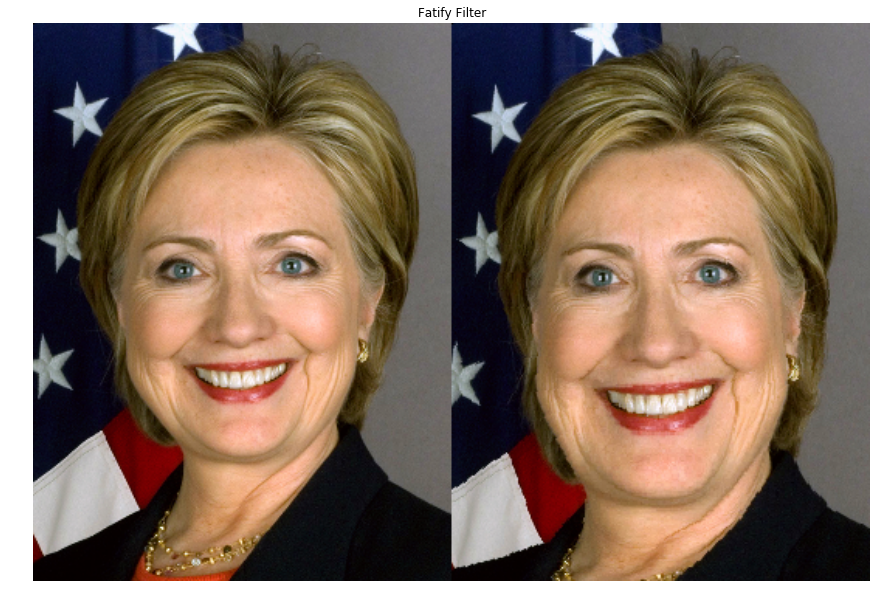

In [65]:
# Display and save the images
combined = np.hstack([src, dst])

plt.figure(figsize = (15,15))
plt.imshow(combined[:,:,::-1])
plt.title('Fatify Filter')
plt.axis('off')

print("Total time {}".format(time.time() - t))

## Happify Filter

In the Happify filter, the deformation points in the original image are shown in red and the corresponding points in the deformed image are shown in blue. See Figure 2 below. The blue control points in the upper part of the face are calculated by extending the line joining a point on the bridge of the nose to the red control points by an offset. Similarly, the blue control points  on the lower half of the face are calculated by extending the line joining the chin to the red control points by an offset value. 

The anchor points are shown in green in Figure 2. 

| <center><a href="https://www.learnopencv.com/wp-content/uploads/2018/01/opcv4face-w5-m5-deformatedRedPoints.png"><img src="https://www.learnopencv.com/wp-content/uploads/2018/01/opcv4face-w5-m5-deformatedRedPoints.png" width=500/></a></center> | <center><a href="https://www.learnopencv.com/wp-content/uploads/2018/01/opcv4face-w5-m5-anchorPoints.png"><img src="https://www.learnopencv.com/wp-content/uploads/2018/01/opcv4face-w5-m5-anchorPoints.png" width=500/></a></center> | 
| -------- | -------- |

<center>Figure 2 : Left: The deformation of the red points ( shown using blue points ) is calculated by extending the link joining the yellow points to the red points by an offset. </center>

Right: Green points represent anchor points. The red points represent deformation points in the input image. The blue points represent the corresponding deformed points in the output image. 



### Happify Code and Tutorial

The following tutorial shows Happify filter for an image. The code for videos is similar and is included in the code section. 

Function for calculating eight boundary points.

In [66]:
# Function to add boundary points of the image to the given set of
#  points
def addBoundaryPoints(cols, rows, points):
  # include the points on the boundaries
  points = np.append(points,[[0, 0]],axis=0)
  points = np.append(points,[[0, cols-1]],axis=0)
  points = np.append(points,[[rows-1, 0]],axis=0)
  points = np.append(points,[[rows-1, cols-1]],axis=0)
  points = np.append(points,[[0, cols/2]],axis=0)
  points = np.append(points,[[rows/2, 0]],axis=0)
  points = np.append(points,[[rows-1, cols/2]],axis=0)
  points = np.append(points,[[rows/2, cols-1]],axis=0)
  return points

Image resize parameters and MLS grid size. 

MLS is expensive to calculate at every pixel. So it is calculated over a grid much bigger than a pixel. 

In [67]:
# Variables for resizing to a standard height
RESIZE_HEIGHT = 360
FACE_DOWNSAMPLE_RATIO = 1.5

# MLS grid size
mls.GRID = 30

Load face detector and landmark detector

In [68]:
# Varibales for Dlib 
modelPath = DATA_PATH + "models/shape_predictor_68_face_landmarks.dat"
faceDetector = dlib.get_frontal_face_detector()
landmarkDetector = dlib.shape_predictor(modelPath)

The variables `offset1` and `offset2` specify the multiplier used for deforming the upper and the lower face. Larger values of offset would cause the blue dots to be located further away from the red dots leading to higher deformation. 


In [69]:
# Parameters for controlling the amount of deformation 
offset1 = 1.5
offset2 = 1.5

The tip of the nose and the chin are chosen as anchor points. Later the boundary points will also be added as anchor points. 

A few points on the lower face and a few on the upper face are chosen for deformation. In Figure 2, these points are represented by the red dots.


In [70]:
# Points that should not move
anchorPoints = [8, 30]

# Points that will be deformed
# For lips
deformedPoints1 = [48, 57, 54]
# For eyes
deformedPoints2 = [21, 22, 36, 45]

Read and resize the image and get the landmarks using dlib.

In [71]:
t = time.time()
# Read an image and get the landmark points
filename = DATA_PATH + '/images/ted_cruz.jpg'
src = cv2.imread(filename)
height, width = src.shape[:2]
IMAGE_RESIZE = np.float32(height)/RESIZE_HEIGHT
src = cv2.resize(src,None,
                   fx=1.0/IMAGE_RESIZE, 
                   fy=1.0/IMAGE_RESIZE, 
                   interpolation = cv2.INTER_LINEAR)
landmarks = fbc.getLandmarks(faceDetector, landmarkDetector, src, 
                             FACE_DOWNSAMPLE_RATIO)

print("Landmarks calculated in {}".format(time.time() - t))

Landmarks calculated in 0.025252103805541992


Two points `center1` and `center2` are chosen for calculating deformation of the lower face points and the upper face points respectively. These points are represented by the yellow points in Figure 2. 

In [72]:
# Set the center to tip of chin
center1x, center1y = landmarks[8][0], landmarks[8][1]
# Set the center to point on nose
center2x, center2y = landmarks[28][0], landmarks[28][1]

Collect all points ( anchor points + deformation points ) in a single array for both the source image ( `srcPoints` ) and destination image ( `dstPoints` ). 

In [73]:
# Variables for storing the original and deformed points
srcPoints = []
dstPoints = []

# Adding the original and deformed points using the landmark points
for idx in anchorPoints:
  srcPoints.append([landmarks[idx][0], landmarks[idx][1]])
  dstPoints.append([landmarks[idx][0], landmarks[idx][1]])

The line joining `center1` and `center2` to the deformation points (red) is scaled by `offset1` and `offset2`  to produce the blue points. 

In [74]:
for idx in deformedPoints1:
  srcPoints.append([landmarks[idx][0], landmarks[idx][1]])
  dstPoints.append([offset1*(landmarks[idx][0] - center1x) + 
                    center1x, offset1*(landmarks[idx][1] - center1y)
                    + center1y])

for idx in deformedPoints2:
  srcPoints.append([landmarks[idx][0], landmarks[idx][1]])
  dstPoints.append([offset2*(landmarks[idx][0] - center2x) + 
                    center2x, offset2*(landmarks[idx][1] - center2y)
                    + center2y])

# Converting them to numpy arrays
srcPoints = np.array(srcPoints)
dstPoints = np.array(dstPoints)

The boundary points are added to both `srcPoints` and `dstPoints`. They serve as additional anchor points.

In [75]:
# Adding the boundary points to keep the image stable globally
srcPoints = addBoundaryPoints(src.shape[0],src.shape[1],srcPoints)
dstPoints = addBoundaryPoints(src.shape[0],src.shape[1],dstPoints)

In [76]:
print("Points gathered {}".format(time.time() - t))

Points gathered 2.7166221141815186


In [77]:
# Performing moving least squares deformation on the image using the 
# points gathered above
dst = mls.MLSWarpImage(src, srcPoints, dstPoints)

print("Warping done {}".format(time.time() - t))

Warping done 3.0948002338409424


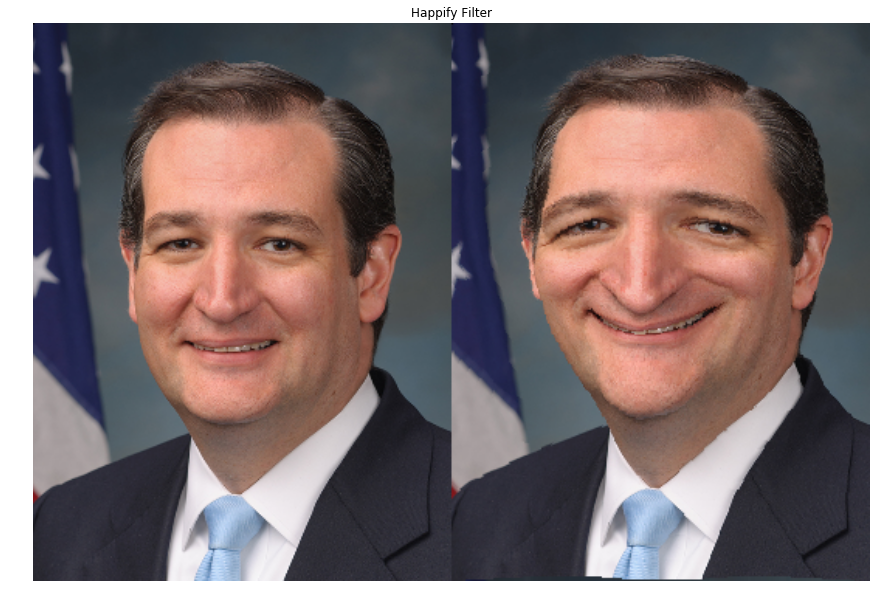

Total time 3.8778271675109863


In [78]:
# Display and save the images
combined = np.hstack([src, dst])

plt.figure(figsize = (15,15))
plt.imshow(combined[:,:,::-1])
plt.title("Happify Filter")
plt.axis('off')
plt.show()


print("Total time {}".format(time.time() - t))

# References and Further Reading

1. [http://chenxing.name/fun/imgwarp-js/](http://chenxing.name/fun/imgwarp-js/)

2. [http://faculty.cs.tamu.edu/schaefer/research/mls.pdf](http://faculty.cs.tamu.edu/schaefer/research/mls.pdf)